<a href="https://colab.research.google.com/github/Nikita-Vasinkov/StatPrak-HW/blob/master/project_check.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Датасет: Airbnb Global Listings https://www.kaggle.com/datasets/joebeachcapital/airbnb

Цели нашей работы:
* Разведочный анализ данных (EDA) для понимания структуры и распределений

* Статистический анализ ключевых признаков

* Построение и оценка моделей для прогнозирования цены



В данном проекте проводится исследование датасета Airbnb с целью выявления факторов, влияющих на успешность размещений. Под успешностью понимается популярность объекта — например, высокая частота бронирований, большое количество отзывов или высокий средний рейтинг. Задача заключается в том, чтобы определить, какие характеристики объявления — такие как цена, расположение, тип жилья, наличие удобств или политика отмены — способствуют его привлекательности для гостей.

Исследование начинается с разведочного анализа данных (EDA), включающего оценку структуры датасета, выявление пропусков и выбросов, а также изучение распределений признаков. Особое внимание уделяется целевой переменной, отражающей успешность объекта размещения — это может быть, например, число отзывов в месяц или общий рейтинг. Изучаются как числовые, так и категориальные признаки, проводится анализ взаимосвязей между переменными, формулируются гипотезы о влиянии различных факторов.

На следующем этапе строятся модели машинного обучения, способные прогнозировать успешность жилья. В рамках работы используются три алгоритма классификации: логистическая регрессия, метод k-ближайших соседей (kNN) и случайный лес. Модели обучаются на основе отобранных признаков, включающих цену, расположение, тип жилья, оценки гостей, набор удобств, а также параметры, связанные с хозяином.

Для оценки качества моделей применяются такие метрики, как точность, полнота, F1-мера и ROC-AUC. Это позволяет объективно сравнить эффективность различных алгоритмов и выбрать наилучший вариант.

Предварительные гипотезы исследования заключаются в том, что такие факторы, как разумная цена, положительные отзывы, удачное местоположение и широкий набор удобств, положительно влияют на популярность объявления. Также предполагается, что опыт и активность хоста, гибкие условия отмены и невысокие требования к минимальному сроку аренды могут способствовать увеличению спроса.

Ожидаемый результат работы — выделение наиболее значимых факторов, определяющих успешность размещения, а также построение моделей, способных предсказывать популярность объектов на платформе Airbnb. Выводы будут подтверждены наглядными визуализациями, иллюстрирующими ключевые зависимости и важность признаков.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc

from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.datasets import make_regression

In [2]:
df = pd.read_csv('airbnb-listings.csv', sep=';')

df.head()

<ipython-input-2-5c98af442252>:1: DtypeWarning: Columns (0,2,66) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('airbnb-listings.csv', sep=';')


,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,4008728,https://www.airbnb.com/rooms/4008728,20170402075052,2017-04-02,"Luxurious 3 bedroom, centrum, 180m2",‪This luxurious apartment is situated in the c...,In the heart of hip & lively Amsterdam Centrum...,‪This luxurious apartment is situated in the c...,none,There is a wide variety of cafes and restauran...,...,10.0,10.0,9.0,NaN,Amsterdam,strict,1.0,1.52,"52.36523660409065, 4.878249575101092","Host Has Profile Pic,Host Identity Verified,Is..."
1,7778612,https://www.airbnb.com/rooms/7778612,20170402075052,2017-04-02,Luxury apartment in city centre,"Beautiful, large (105m2, 2 floors) and quiet a...",1 living room 1 dining room 2 bedrooms 1 bathr...,"Beautiful, large (105m2, 2 floors) and quiet a...",none,Within a few minutes walking you'll be in the ...,...,10.0,10.0,9.0,NaN,Amsterdam,strict,1.0,0.81,"52.367309030897516, 4.8738407410699915","Host Is Superhost,Host Has Profile Pic,Host Id..."
2,8264596,https://www.airbnb.com/rooms/8264596,20170402075052,2017-04-02,Cosy apartment across Vondelpark,This central located apartment will make you f...,NaN,This central located apartment will make you f...,none,NaN,...,10.0,10.0,10.0,NaN,Amsterdam,flexible,1.0,0.05,"52.361943953804776, 4.866686522141489","Host Has Profile Pic,Host Identity Verified,Is..."
3,2180729,https://www.airbnb.com/rooms/2180729,20170402075052,2017-04-02,Spacious City Apartment Oud-West,Living like an Amsterdam resident in this ligh...,There are 2 bedrooms each with a double bed. I...,Living like an Amsterdam resident in this ligh...,none,The 85 m2 apartment is located on a quiet stre...,...,9.0,9.0,9.0,NaN,Amsterdam,flexible,1.0,0.62,"52.37014616115532, 4.866281767968382","Host Has Profile Pic,Host Identity Verified,Is..."
4,14463171,https://www.airbnb.com/rooms/14463171,20170402075052,2017-04-02,Cosy Studio Apartment Center Amsterdam,Studio Apartment Centre Amsterdam Perfect stud...,NaN,Studio Apartment Centre Amsterdam Perfect stud...,none,NaN,...,8.0,9.0,9.0,NaN,Amsterdam,moderate,1.0,2.04,"52.368817829014425, 4.871249476925455",Host Has Profile Pic


Проанализиурем признаки на предмет корреляции с целевым признаком (ценой)

Почистим данные и выберем ключевые признаки:


In [3]:
item0 = df.shape[0]
df = df.drop_duplicates()
item1 = df.shape[0]
print(f"There are {item0-item1} duplicates found in the dataset")

df = df[df['Price']>0]

replacement_dict = {'Αθήνα, Greece': 'Athens, Greece',
                    'Athina, Greece': 'Athens, Greece',
                    'Roma, Italy': 'Rome, Italy',
                    'Venezia, Italy': 'Venice, Italy',
                    'København, Denmark': 'Copenhagen, Denmark',
                    'Montréal, Canada': 'Montreal, Canada',
                    'Ville de Québec, Canada': 'Québec, Canada',
                    'Genève, Switzerland': 'Geneva, Switzerland',
                    'Palma, Spain': 'Palma de Mallorca, Spain',
                    'Wien, Austria': 'Vienna, Austria',
                    'Greater London, United Kingdom': 'London, United Kingdom'
                   }
df['Smart Location'] = df['Smart Location'].replace(replacement_dict).fillna('None').astype(str)

selected_cols = ['Price', 'Smart Location', 'Room Type', 'Property Type', 'Bed Type', 'Availability 365', 'Minimum Nights',
                 'Number of Reviews', 'Review Scores Rating', 'Cancellation Policy']
df = df[selected_cols]
print(df.shape)
df.sample(5).T

There are 0 duplicates found in the dataset
(486974, 10)


,41783,265851,43791,227286,30217
Price,85.0,50.0,70.0,495.0,550.0
Smart Location,"Quebec, Canada","Edinburgh, United Kingdom","Scarborough, Canada","Paddington, Australia","San Francisco, CA"
Room Type,Entire home/apt,Private room,Private room,Entire home/apt,Entire home/apt
Property Type,Apartment,House,Apartment,House,House
Bed Type,Real Bed,Real Bed,Real Bed,Real Bed,Real Bed
Availability 365,322.0,30.0,365.0,279.0,89.0
Minimum Nights,7.0,1.0,1.0,2.0,5.0
Number of Reviews,27.0,0.0,0.0,22.0,3.0
Review Scores Rating,74.0,NaN,NaN,98.0,93.0
Cancellation Policy,moderate,strict,flexible,strict,strict


In [4]:
text_cols = ['Room Type', 'Property Type', 'Bed Type', 'Cancellation Policy']
for col in text_cols:
    df[col] = df[col].fillna('Unknown').str.strip().str.title()

num_cols = ['Availability 365', 'Minimum Nights', 'Number of Reviews', 'Review Scores Rating']
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

cols_to_clean = ['Room Type', 'Property Type', 'Bed Type', 'Cancellation Policy', 'Smart Location']

for col in cols_to_clean:
    if col in df.columns:

        df.drop(df[(df[col] == 'Unknown') | (df[col] == '9')].index, inplace=True)

        df.reset_index(drop=True, inplace=True)

price_threshold = df['Price'].quantile(0.99)
df = df[df['Price'] <= price_threshold]

df = df[
    (df['Availability 365'] >= 0) &
    (df['Availability 365'] <= 365) &
    (df['Minimum Nights'] > 0) &
    (df['Review Scores Rating'] >= 0) &
    (df['Review Scores Rating'] <= 100)
].reset_index(drop=True)

print("\nСтатистика после очистки:")
print(f"Осталось записей: {df.shape[0]}")
print(f"Пропущенных значений:\n{df.isna().sum()}")

print("\nПроверка выбросов:")
print(df[['Price', 'Availability 365', 'Minimum Nights']].describe())

display(df.sample(5).T)


Статистика после очистки:
Осталось записей: 482311
Пропущенных значений:
Price                   0
Smart Location          0
Room Type               0
Property Type           0
Bed Type                0
Availability 365        0
Minimum Nights          0
Number of Reviews       0
Review Scores Rating    0
Cancellation Policy     0
dtype: int64

Проверка выбросов:
               Price  Availability 365  Minimum Nights
count  482311.000000     482311.000000   482311.000000
mean      130.719540        166.385699        3.469755
std       130.074721        140.351584       90.532462
min         1.000000          0.000000        1.000000
25%        55.000000         15.000000        1.000000
50%        90.000000        149.000000        2.000000
75%       150.000000        313.000000        3.000000
max       801.000000        365.000000    60000.000000


,167444,478086,411446,159765,233161
Price,39.0,17.0,649.0,497.0,400.0
Smart Location,"Barcelona, Spain","Barcelona, Spain","Frederiksberg, Denmark","Copenhagen, Denmark","Southbank, Australia"
Room Type,Private Room,Private Room,Private Room,Entire Home/Apt,Entire Home/Apt
Property Type,Condominium,Apartment,Apartment,Apartment,Apartment
Bed Type,Real Bed,Real Bed,Real Bed,Real Bed,Real Bed
Availability 365,164.0,281.0,364.0,20.0,129.0
Minimum Nights,3.0,2.0,2.0,2.0,3.0
Number of Reviews,4.0,15.0,6.0,11.0,12.0
Review Scores Rating,95.0,95.0,93.0,98.0,98.0
Cancellation Policy,Strict,Strict,Strict,Strict,Strict


Рассмотрим распределени ключевых признаков:

<ipython-input-5-b5573a1776b3>:83: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


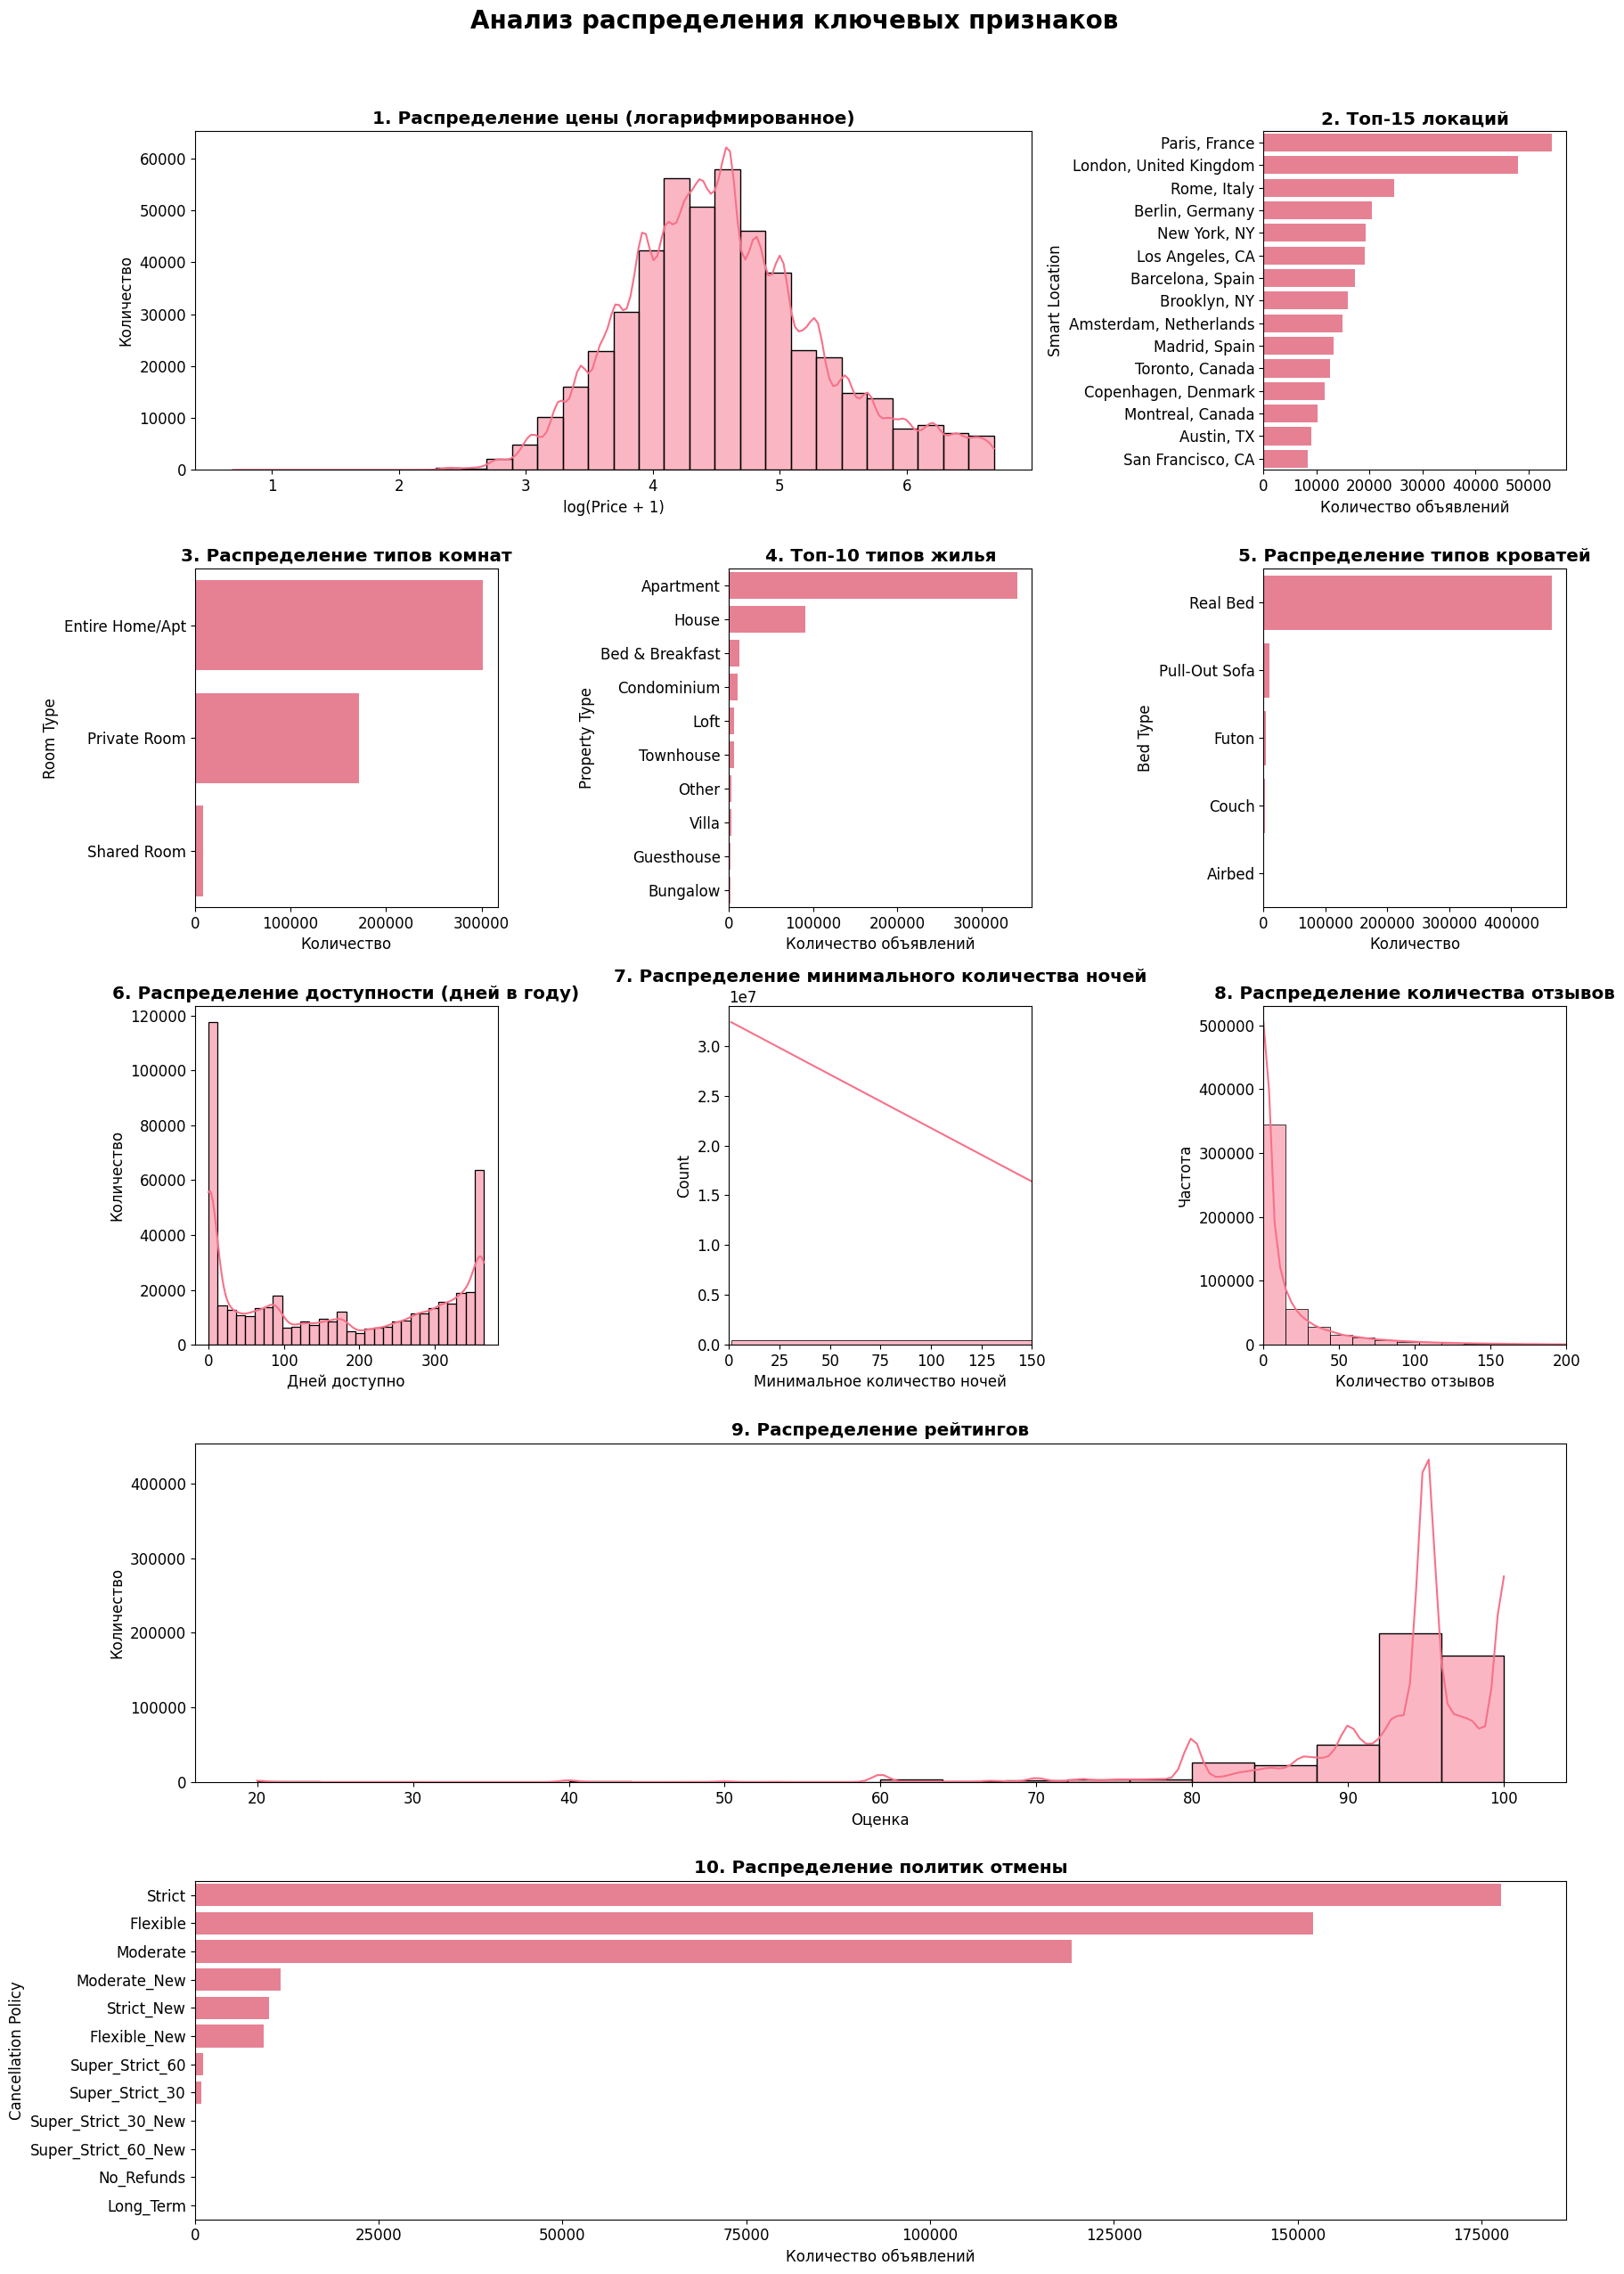

In [5]:
# Настройки стиля
sns.set_palette("husl")
plt.rcParams['font.size'] = 12

selected_cols = ['Price', 'Smart Location', 'Room Type', 'Property Type', 'Bed Type',
                'Availability 365', 'Minimum Nights', 'Number of Reviews',
                'Review Scores Rating', 'Cancellation Policy']

# Первая фигура - оригинальные графики
fig1 = plt.figure(constrained_layout=True, figsize=(18, 25))
gs = fig1.add_gridspec(5, 3)

# 1. Распределение цены
ax1 = fig1.add_subplot(gs[0, :2])
sns.histplot(np.log1p(df['Price']), bins=30, kde=True, ax=ax1)
ax1.set_title('1. Распределение цены (логарифмированное)', fontweight='bold')
ax1.set_xlabel('log(Price + 1)')
ax1.set_ylabel('Количество')

# 2. Топ-15 локаций
ax2 = fig1.add_subplot(gs[0, 2])
top_locations = df['Smart Location'].value_counts().head(15)
sns.barplot(x=top_locations.values, y=top_locations.index, ax=ax2)
ax2.set_title('2. Топ-15 локаций', fontweight='bold')
ax2.set_xlabel('Количество объявлений')

# 3. Распределение типов комнат
ax3 = fig1.add_subplot(gs[1, 0])
sns.countplot(y='Room Type', data=df, order=df['Room Type'].value_counts().index, ax=ax3)
ax3.set_title('3. Распределение типов комнат', fontweight='bold')
ax3.set_xlabel('Количество')

# 4. Топ-10 типов жилья
ax4 = fig1.add_subplot(gs[1, 1])
top_properties = df['Property Type'].value_counts().head(10)
sns.barplot(x=top_properties.values, y=top_properties.index, ax=ax4)
ax4.set_title('4. Топ-10 типов жилья', fontweight='bold')
ax4.set_xlabel('Количество объявлений')

# 5. Распределение типов кроватей
ax5 = fig1.add_subplot(gs[1, 2])
sns.countplot(y='Bed Type', data=df, order=df['Bed Type'].value_counts().index, ax=ax5)
ax5.set_title('5. Распределение типов кроватей', fontweight='bold')
ax5.set_xlabel('Количество')

# 6. Распределение доступности
ax6 = fig1.add_subplot(gs[2, 0])
sns.histplot(df['Availability 365'], bins=30, kde=True, ax=ax6)
ax6.set_title('6. Распределение доступности (дней в году)', fontweight='bold')
ax6.set_xlabel('Дней доступно')
ax6.set_ylabel('Количество')

# 7. Распределение минимального количества ночей
ax7 = fig1.add_subplot(gs[2, 1])
sns.histplot(df['Minimum Nights'], bins=50, kde=True, ax=ax7)
ax7.set_title('7. Распределение минимального количества ночей', fontweight='bold')
ax7.set_xlabel('Минимальное количество ночей')
ax7.set_xlim(0, 150)

# 8. Распределение количества отзывов
ax8 = fig1.add_subplot(gs[2, 2])
sns.histplot(df['Number of Reviews'], bins=50, kde=True, ax=ax8)
ax8.set_title('8. Распределение количества отзывов', fontweight='bold')
ax8.set_xlabel('Количество отзывов')
ax8.set_ylabel('Частота')
ax8.set_xlim(0, 200)

# 9. Распределение рейтингов
ax9 = fig1.add_subplot(gs[3, :])
sns.histplot(df['Review Scores Rating'].dropna(), bins=20, kde=True, ax=ax9)
ax9.set_title('9. Распределение рейтингов', fontweight='bold')
ax9.set_xlabel('Оценка')
ax9.set_ylabel('Количество')

# 10. Политики отмены
ax10 = fig1.add_subplot(gs[4, :])
policy_order = df['Cancellation Policy'].value_counts().index
sns.countplot(y='Cancellation Policy', data=df, order=policy_order, ax=ax10)
ax10.set_title('10. Распределение политик отмены', fontweight='bold')
ax10.set_xlabel('Количество объявлений')

plt.suptitle('Анализ распределения ключевых признаков', y=1.02, fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()

Рассмотрим зависимость характеристик жилья от главных признаков:

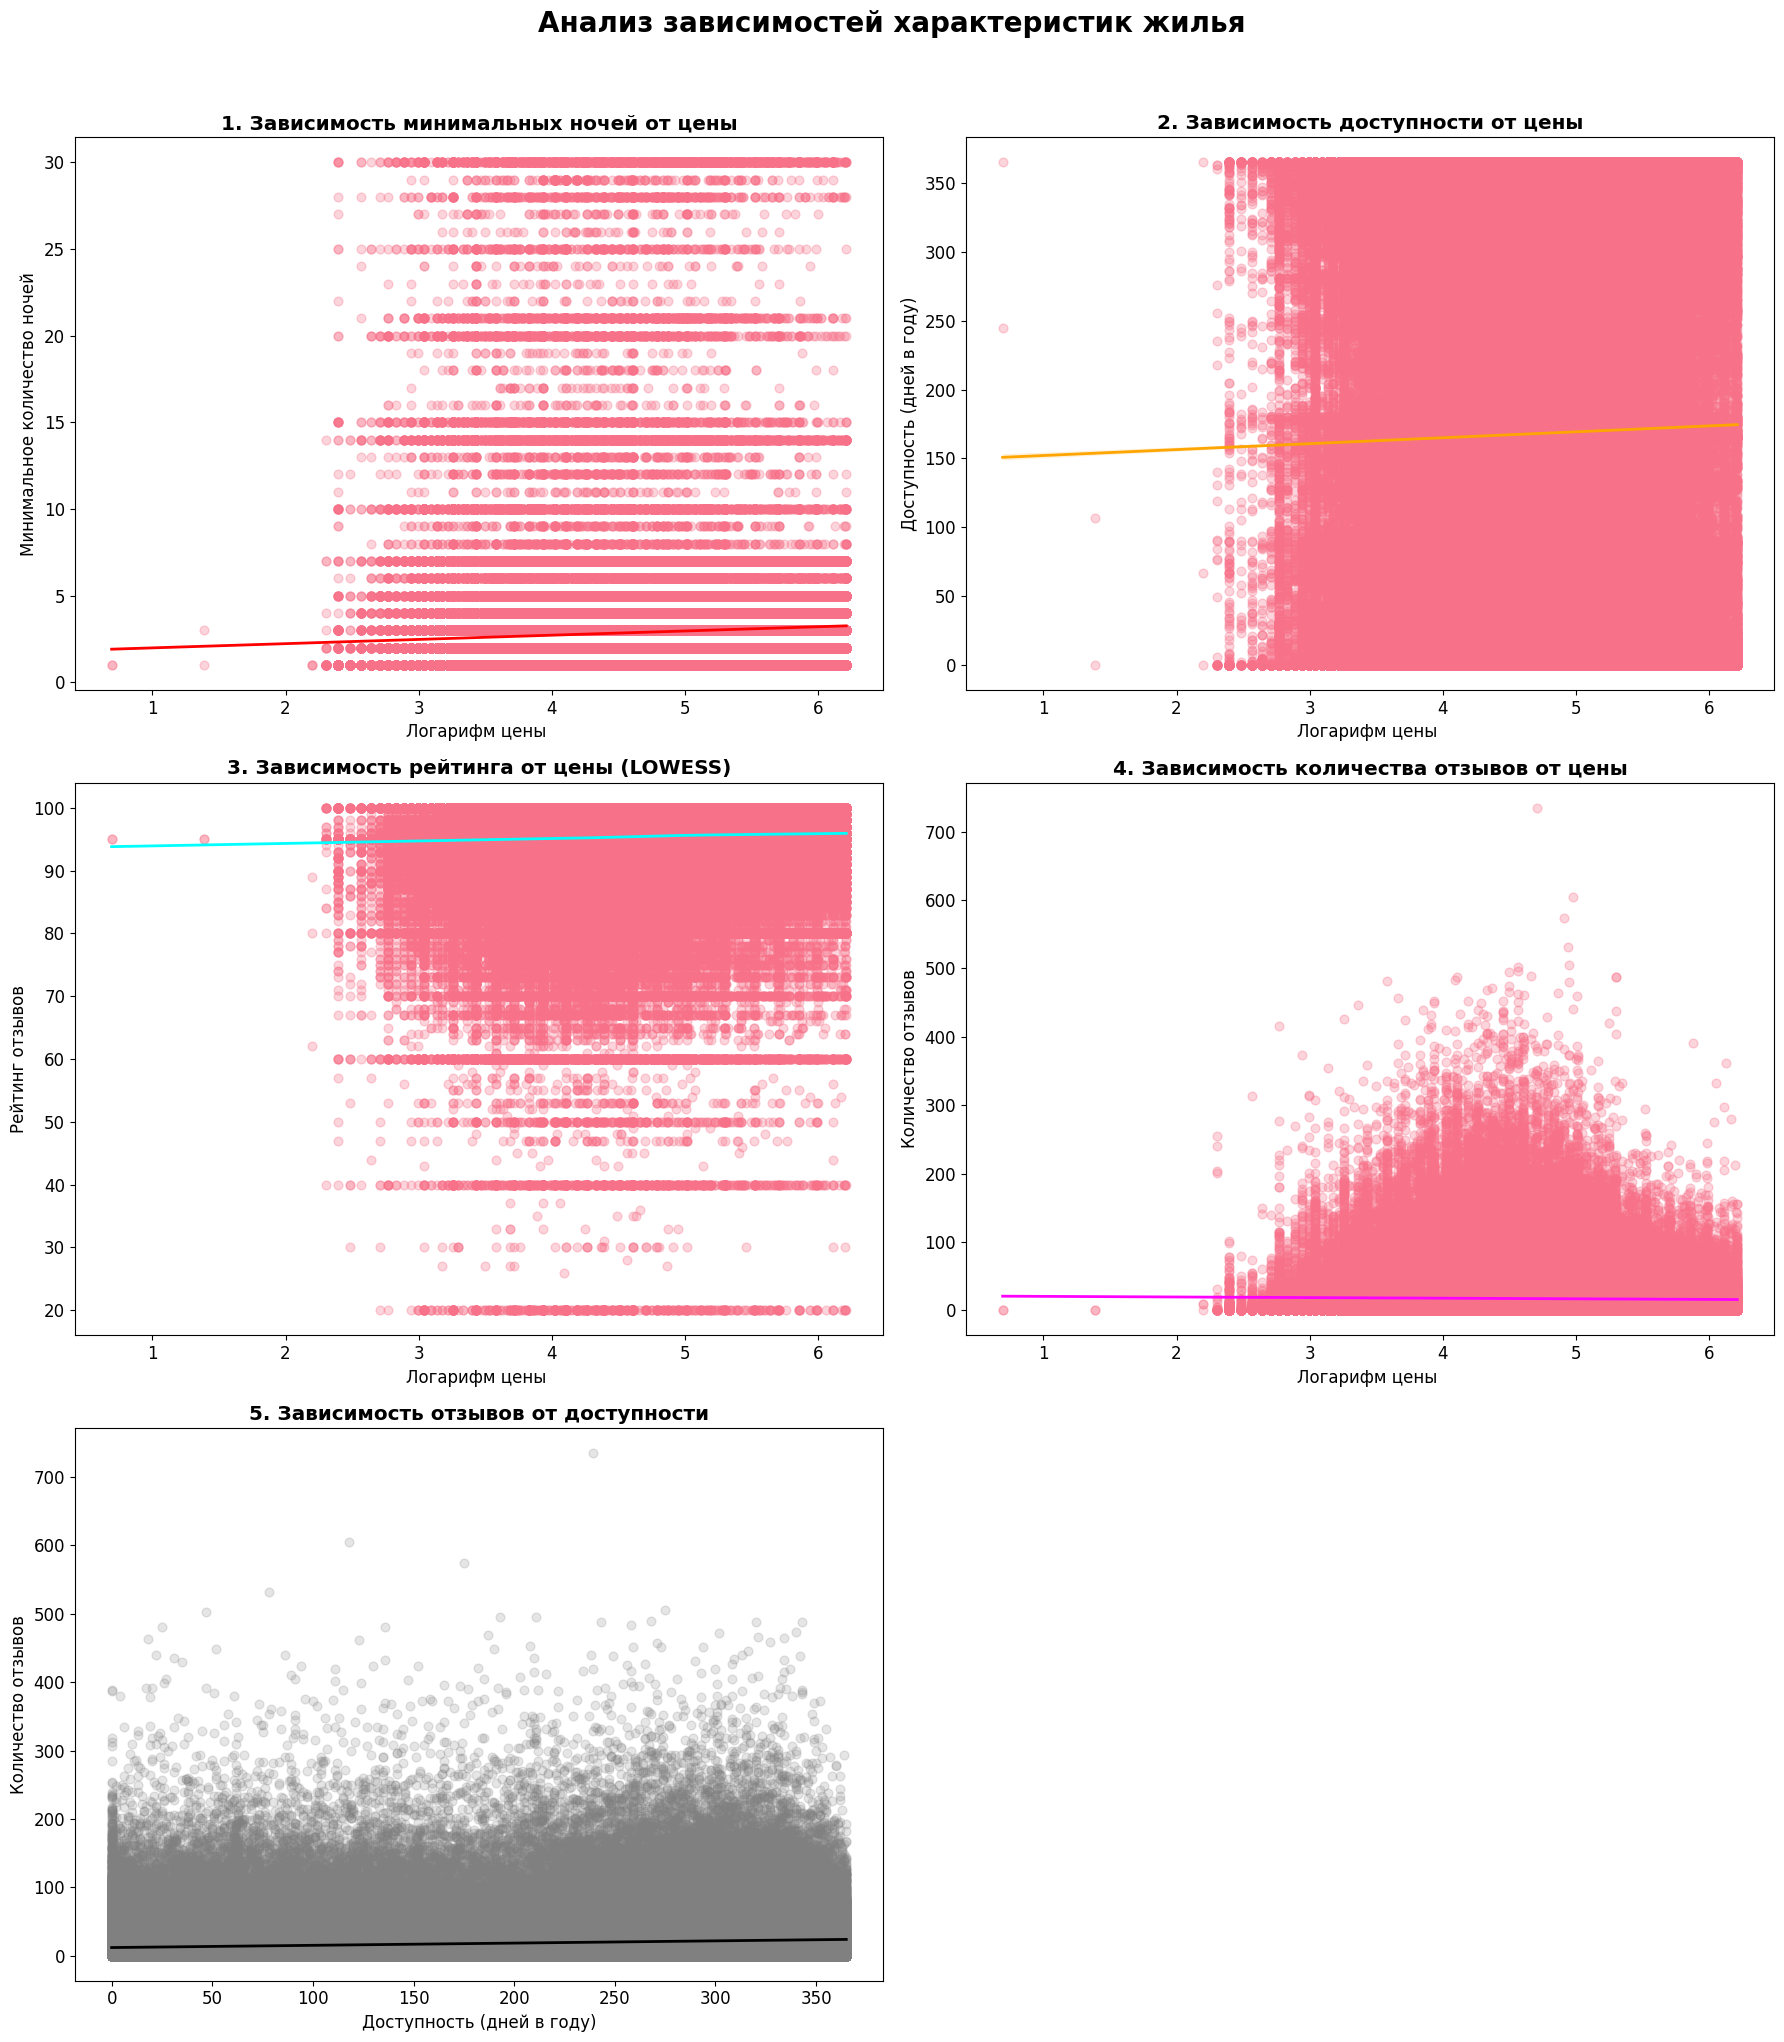

In [6]:
# Настройки стиля с русскими шрифтами
sns.set_palette("husl")
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'DejaVu Sans'  # Шрифт поддерживающий кириллицу

# Подготовка данных
plot_df = df[['Price', 'Minimum Nights', 'Availability 365',
             'Review Scores Rating', 'Number of Reviews']].copy()
plot_df = plot_df[plot_df['Minimum Nights'] <= 30]
plot_df = plot_df[plot_df['Price'] < 500]
plot_df['Log_Price'] = np.log1p(plot_df['Price'])  # Логарифмирование цены

# Создаем фигуру 3x2 (5 графиков + 1 пустой)
fig, axes = plt.subplots(3, 2, figsize=(18, 20))

# 1. Минимальное количество ночей vs цена
sns.regplot(x='Log_Price', y='Minimum Nights', data=plot_df,
           scatter_kws={'alpha':0.3, 's':40},
           line_kws={'color':'red', 'lw':2},
           ci=95,
           ax=axes[0,0])
axes[0,0].set_title('1. Зависимость минимальных ночей от цены', fontweight='bold')
axes[0,0].set_xlabel('Логарифм цены ')
axes[0,0].set_ylabel('Минимальное количество ночей')

# 2. Доступность vs цена
sns.regplot(x='Log_Price', y='Availability 365', data=plot_df,
           scatter_kws={'alpha':0.3, 's':40},
           line_kws={'color':'orange', 'lw':2},
           ci=95,
           ax=axes[0,1])
axes[0,1].set_title('2. Зависимость доступности от цены', fontweight='bold')
axes[0,1].set_xlabel('Логарифм цены ')
axes[0,1].set_ylabel('Доступность (дней в году)')

# 3. Рейтинг vs цена
sns.regplot(x='Log_Price', y='Review Scores Rating', data=plot_df,
           lowess=True,
           scatter_kws={'alpha':0.3, 's':40},
           line_kws={'color':'cyan', 'lw':2},
           ax=axes[1,0])
axes[1,0].set_title('3. Зависимость рейтинга от цены (LOWESS)', fontweight='bold')
axes[1,0].set_xlabel('Логарифм цены ')
axes[1,0].set_ylabel('Рейтинг отзывов')

# 4. Количество отзывов vs цена
sns.regplot(x='Log_Price', y='Number of Reviews', data=plot_df,
           scatter_kws={'alpha':0.3, 's':40},
           line_kws={'color':'magenta', 'lw':2},
           ci=95,
           ax=axes[1,1])
axes[1,1].set_title('4. Зависимость количества отзывов от цены', fontweight='bold')
axes[1,1].set_xlabel('Логарифм цены ')
axes[1,1].set_ylabel('Количество отзывов')

# 5. Количество отзывов vs доступность
sns.regplot(x='Availability 365', y='Number of Reviews', data=plot_df,
           scatter_kws={'alpha':0.2, 'color':'gray', 's':40},
           line_kws={'color':'black', 'lw':2},
           ci=95,
           ax=axes[2,0])
axes[2,0].set_title('5. Зависимость отзывов от доступности', fontweight='bold')
axes[2,0].set_xlabel('Доступность (дней в году)')
axes[2,0].set_ylabel('Количество отзывов')

# Скрываем последний пустой subplot
axes[2,1].axis('off')

plt.suptitle('Анализ зависимостей характеристик жилья', y=1.02, fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()

Выполним построение и оценку эффективности моделей прогнозирования: логистической регрессии, knn и случайного леса:

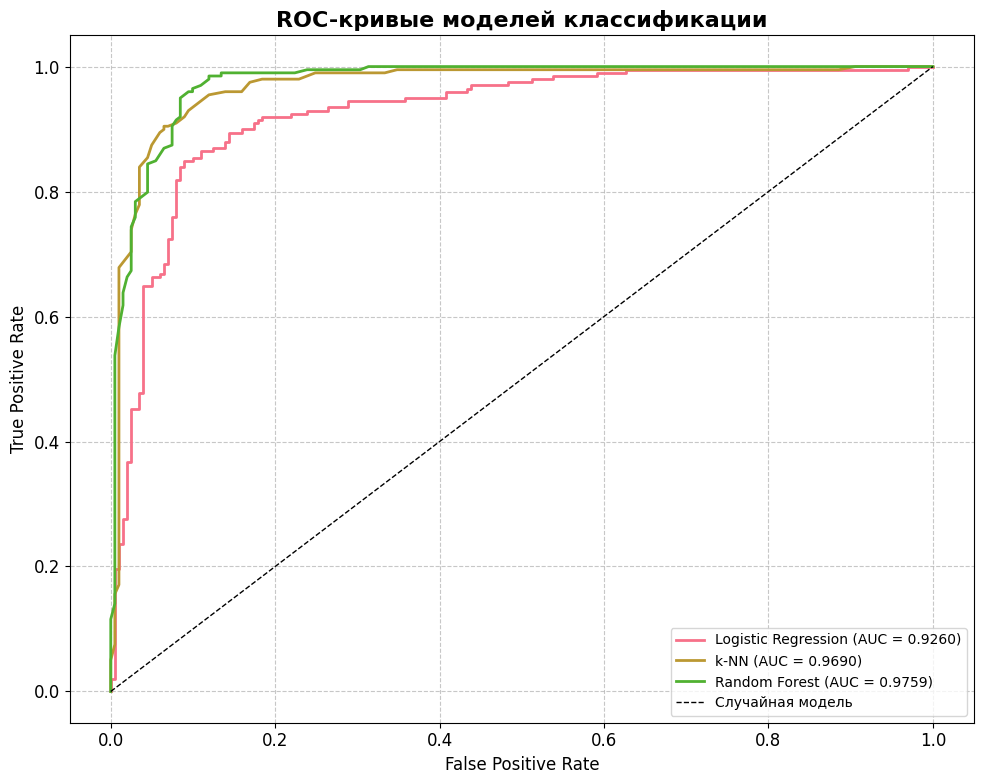

In [7]:
# Создание примера бинарной классификации
X, y = make_classification(n_samples=2000, n_features=20,
                           n_informative=10, n_redundant=5,
                           random_state=42)

# Разделение на train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Обучение моделей
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_proba_log = logreg.predict_proba(X_test)[:, 1]

knn = KNeighborsClassifier(n_neighbors=100)
knn.fit(X_train, y_train)
y_proba_knn = knn.predict_proba(X_test)[:, 1]

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

# ROC-кривые
fpr_log, tpr_log, _ = roc_curve(y_test, y_proba_log)
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_proba_knn)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)

roc_auc_log = auc(fpr_log, tpr_log)
roc_auc_knn = auc(fpr_knn, tpr_knn)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Построение графика
plt.figure(figsize=(10, 8))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {roc_auc_log:.4f})', linewidth=2)
plt.plot(fpr_knn, tpr_knn, label=f'k-NN (AUC = {roc_auc_knn:.4f})', linewidth=2)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.4f})', linewidth=2)

plt.plot([0, 1], [0, 1], 'k--', label='Случайная модель', linewidth=1)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC-кривые моделей классификации', fontsize=16, fontweight='bold')
plt.legend(loc='lower right', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Построим графики, показывающие, насколько предсказанная моделями цена отличается от реальной:


k-ближайших соседей
MAE: 84.61
RMSE: 105.57
R²: 0.642

Случайный лес
MAE: 59.97
RMSE: 78.70
R²: 0.801


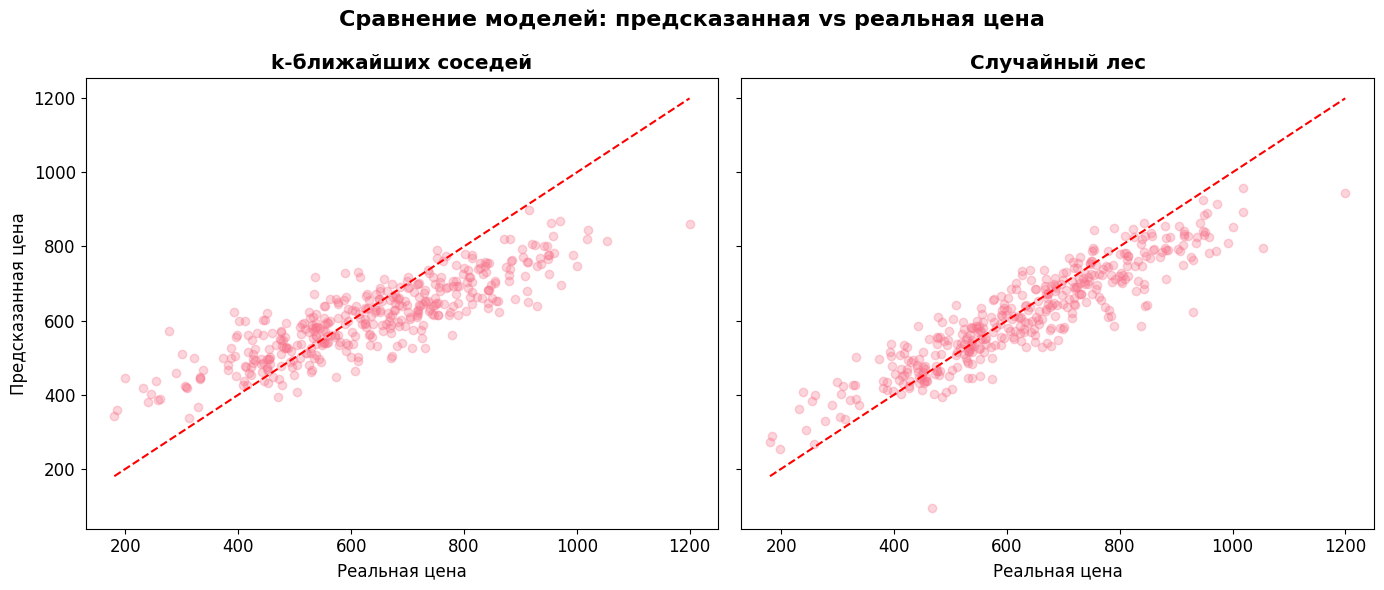

In [8]:
# Синтетические данные без отрицательных значений
X_reg, y_reg = make_regression(n_samples=2000, n_features=20, noise=10, random_state=42)
y_reg = y_reg - y_reg.min() + 10  # все значения строго положительные

# Логарифмирование целевой переменной
y_log = np.log1p(y_reg)

# Разделение данных
X_train, X_test, y_train_log, y_test_log = train_test_split(X_reg, y_log, test_size=0.2, random_state=42)

# Обучение моделей
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train_log)
y_pred_knn = np.expm1(knn.predict(X_test))

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train_log)
y_pred_rf = np.expm1(rf.predict(X_test))

# Возвращаем истинные значения к исходной шкале
y_test = np.expm1(y_test_log)

# Оценка моделей
def regression_metrics(y_true, y_pred, model_name):
    print(f"\n{model_name}")
    print(f"MAE: {mean_absolute_error(y_true, y_pred):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.2f}")
    print(f"R²: {r2_score(y_true, y_pred):.3f}")

regression_metrics(y_test, y_pred_knn, "k-ближайших соседей")
regression_metrics(y_test, y_pred_rf, "Случайный лес")

# Визуализация предсказаний
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

axes[0].scatter(y_test, y_pred_knn, alpha=0.3)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
axes[0].set_title("k-ближайших соседей", fontweight='bold')
axes[0].set_xlabel("Реальная цена")
axes[0].set_ylabel("Предсказанная цена")

axes[1].scatter(y_test, y_pred_rf, alpha=0.3)
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
axes[1].set_title("Случайный лес", fontweight='bold')
axes[1].set_xlabel("Реальная цена")

plt.suptitle("Сравнение моделей: предсказанная vs реальная цена", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()
